<div class="alert alert-block alert-success">
    <b><center>LINEAR REGRESSION</center></b>
    <b><center>Tensorflow 2를 이용한 코드 예제</center></b>
</div>

# Configure Learning Environment

In [1]:
# !pip install git+https://github.com/nockchun/rspy --force
import rspy as rsp
rsp.setSystemWarning(off=True)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import tensorflow as tf
from tensorflow.keras import utils, layers, models, losses

In [3]:
np.set_printoptions(linewidth=200, precision=2)
sns.set_style("whitegrid")
tf.__version__

'2.0.0'

# Prepare Datas

>* total_bill : 전체 음식 가격 (US dollars)
>* tip        : 팁 금액 (US dollars)
>* sex        : 성별 (0=male, 1=female)
>* smoker     : 흡연 여부 (0=No, 1=Yes)
>* day        : 요일 (3=Thur, 4=Fri, 5=Sat, 6=Sun)
>* time       : 시간대 (0=Lunch, 1=Dinner)
>* size       : 동행자 수

In [4]:
tips = sns.load_dataset("tips")
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [5]:
# tips.sex.unique()

In [6]:
# tips.replace({ "sex": {"Male": 0, "Female": 1}, "smoker": {"No": 0, "Yes": 1} }, inplace=True)
# tips.head(3)

In [7]:
data = tips[["total_bill", "size"]].values
label = tips[["tip"]].values

# Analysis Datas

In [8]:
tips.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


## Generate Model

In [9]:
model = models.Sequential([
    layers.Input([2]),
    layers.Dense(1)
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


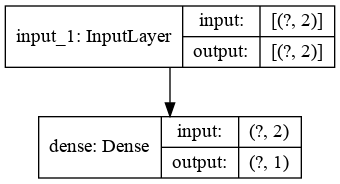

In [10]:
utils.plot_model(model, 'model.png', show_shapes=True)

In [11]:
model.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.SGD(1e-5)
)

## Training

In [12]:
history = model.fit(
    data, label, epochs=50
)

Train on 244 samples
Epoch 1/50
244/244 [==============================] - 0s 2ms/sample - loss: 274.1428
Epoch 2/50
244/244 [==============================] - 0s 44us/sample - loss: 234.8985
Epoch 3/50
244/244 [==============================] - 0s 44us/sample - loss: 201.7830
Epoch 4/50
244/244 [==============================] - 0s 45us/sample - loss: 173.1992
Epoch 5/50
244/244 [==============================] - 0s 44us/sample - loss: 148.5527
Epoch 6/50
244/244 [==============================] - 0s 44us/sample - loss: 127.7077
Epoch 7/50
244/244 [==============================] - 0s 43us/sample - loss: 109.7929
Epoch 8/50
244/244 [==============================] - 0s 43us/sample - loss: 94.5320
Epoch 9/50
244/244 [==============================] - 0s 43us/sample - loss: 81.5283
Epoch 10/50
244/244 [==============================] - 0s 43us/sample - loss: 70.2839
Epoch 11/50
244/244 [==============================] - 0s 46us/sample - loss: 60.5540
Epoch 12/50
244/244 [===============

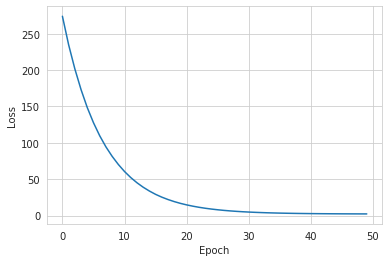

In [13]:
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(history.history["loss"])
plt.show()

## Predict

In [14]:
errors = []
for itemData, itemLabel in zip(data, label):
    predicted = model.predict([itemData.tolist()])
    tip = np.asscalar(itemLabel)
    tipPred = np.asscalar(predicted)
    errors.append(tip - tipPred)

In [15]:
np.average(np.abs(errors))

1.185149012654409

In [16]:
errors

[-1.1752993965148926,
 1.6474019809067248,
 1.1989600658416748,
 -0.31013339996337885,
 1.2875882244110106,
 2.237456045150757,
 1.5776800215244293,
 0.3064421367645265,
 0.19292553424835202,
 1.5186890172958374,
 0.9659684514999389,
 0.3891463279724121,
 -0.2785747575759887,
 1.9987504482269287,
 1.2979651880264282,
 0.7502626609802245,
 1.6595467944443225,
 2.4212791538238525,
 2.065436840057373,
 1.1261709690093995,
 1.695239143371582,
 -0.1430654525756836,
 0.30635915279388426,
 2.0769325065612794,
 0.3877379226684572,
 1.4717248344421385,
 0.5910979509353638,
 0.7369405031204224,
 1.104525852203369,
 0.24419832229614258,
 0.860390019416809,
 1.5159084796905518,
 1.2286359071731567,
 0.9640383243560793,
 0.9152655792236328,
 0.6448133945465089,
 0.7069900035858154,
 1.6440156173706053,
 0.5065405941009522,
 0.49845266342163086,
 1.0048975849151613,
 0.25389770507812504,
 1.528847393989563,
 0.702508397102356,
 2.0314920902252194,
 0.5358834266662598,
 1.690854549407959,
 2.00254273